<a href="https://www.kaggle.com/code/avtnshm/food-waste-un-eda?scriptVersionId=146545470" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df= pd.read_csv('/kaggle/input/food-waste/Food Waste data and research - by country.csv')
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [3]:
df.isna().sum()/len(df)*100

Country                                   0.0
combined figures (kg/capita/year)         0.0
Household estimate (kg/capita/year)       0.0
Household estimate (tonnes/year)          0.0
Retail estimate (kg/capita/year)          0.0
Retail estimate (tonnes/year)             0.0
Food service estimate (kg/capita/year)    0.0
Food service estimate (tonnes/year)       0.0
Confidence in estimate                    0.0
M49 code                                  0.0
Region                                    0.0
Source                                    0.0
dtype: float64

In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,214,214,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combined figures (kg/capita/year),214.0,NaN,NaN,NaN,126.794393,22.157879,61.0,115.0,123.0,137.75,260.0
Household estimate (kg/capita/year),214.0,NaN,NaN,NaN,84.294393,18.313705,33.0,74.0,80.0,95.0,189.0
Household estimate (tonnes/year),214.0,NaN,NaN,NaN,2658895.654206,8596906.218942,850.0,68315.5,520508.0,2111314.5,91646213.0
Retail estimate (kg/capita/year),214.0,NaN,NaN,NaN,15.116822,5.76784,3.0,13.0,16.0,16.0,79.0
Retail estimate (tonnes/year),214.0,NaN,NaN,NaN,552045.429907,2195578.490114,138.0,12509.25,100650.0,356815.75,22424705.0
Food service estimate (kg/capita/year),214.0,NaN,NaN,NaN,27.383178,6.50842,3.0,26.0,28.0,28.0,90.0
Food service estimate (tonnes/year),214.0,NaN,NaN,NaN,1138859.247664,5380459.138806,276.0,22391.25,188466.0,630761.75,65377741.0
Confidence in estimate,214,4,Very Low Confidence,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M49 code,214.0,NaN,NaN,NaN,433.971963,252.185786,4.0,219.0,432.0,645.25,894.0


In [5]:
df.drop(columns=['M49 code', 'Source'], inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   Region                                  214 non-null    object
dtypes: int64(7), object(3)
memory usage: 16.8+ KB


#### Top and last 10 Countries by Combined Figure and Region

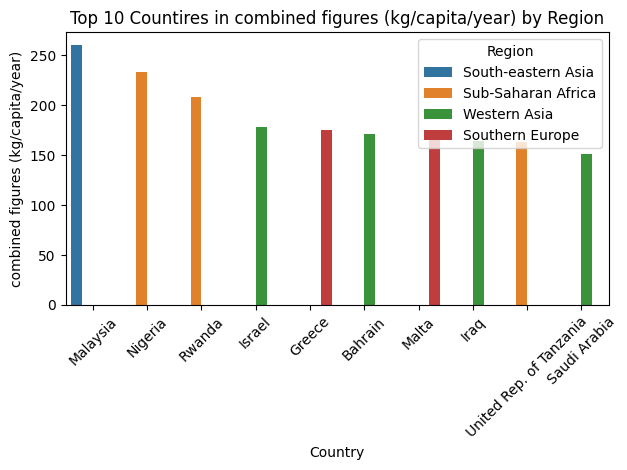

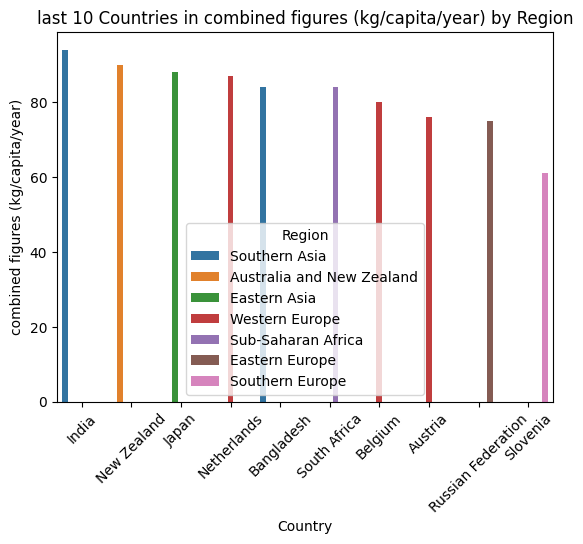

In [6]:
sorted_df = df.sort_values(by='combined figures (kg/capita/year)', ascending=False)

top_10_values =sorted_df.head(10)
sns.barplot(x=top_10_values['Country'], y='combined figures (kg/capita/year)', hue='Region', data=top_10_values)
plt.xlabel('Country') 
plt.ylabel('combined figures (kg/capita/year)')  
plt.title('Top 10 Countires in combined figures (kg/capita/year) by Region') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

last_10_values =sorted_df.tail(10)
sns.barplot(x=last_10_values['Country'], y='combined figures (kg/capita/year)', hue='Region', data=last_10_values)
plt.xlabel('Country') 
plt.ylabel('combined figures (kg/capita/year)')  
plt.title('last 10 Countries in combined figures (kg/capita/year) by Region') 
plt.xticks(rotation=45) 
plt.show()

#### Correlation between Combined, Household and Retails Estimates

In [7]:
c_m = df[['combined figures (kg/capita/year)','Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)' ]].corr()
c_m

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Retail estimate (kg/capita/year),Food service estimate (kg/capita/year)
combined figures (kg/capita/year),1.000000,0.871324,0.555106,0.460778
Household estimate (kg/capita/year),0.871324,1.000000,0.150389,0.019295
Retail estimate (kg/capita/year),0.555106,0.150389,1.000000,0.580474
Food service estimate (kg/capita/year),0.460778,0.019295,0.580474,1.000000


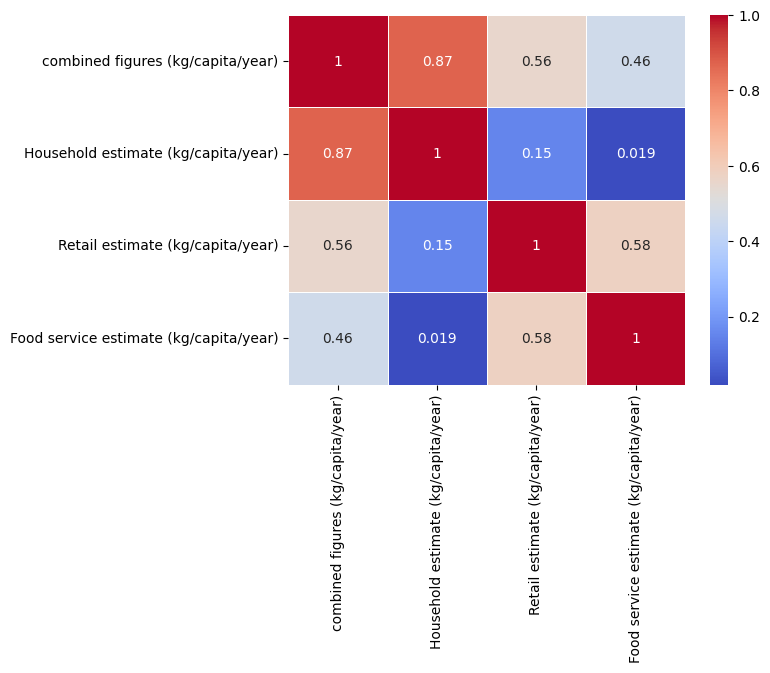

In [8]:
sns.heatmap(c_m, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [9]:
pivot_table= df.pivot_table(index='Country',values=['Retail estimate (tonnes/year)','Food service estimate (kg/capita/year)'])
pivot_table

,Food service estimate (kg/capita/year),Retail estimate (tonnes/year)
Country,,
Afghanistan,28,594982
Albania,28,45058
Algeria,28,673360
Andorra,26,988
Angola,28,497755
...,...,...
Venezuela (Boliv. Rep. of),28,445994
Viet Nam,28,1508689
Yemen,28,456099


In [10]:
sorted_pivot = pivot_table.sort_values(by='Retail estimate (tonnes/year)', ascending=True)
food_service_vs_retail_by_country = pd.DataFrame(sorted_pivot)
food_service_vs_retail_by_country['Country'] =food_service_vs_retail_by_country.index
food_service_vs_retail_by_country

,Food service estimate (kg/capita/year),Retail estimate (tonnes/year),Country
Country,,,
Nauru,26,138,Nauru
Tuvalu,28,181,Tuvalu
Palau,26,231,Palau
British Virgin Islands,26,384,British Virgin Islands
Gibraltar,26,432,Gibraltar
...,...,...,...
Pakistan,28,3387131,Pakistan
Indonesia,28,4232646,Indonesia
United States of America,64,5151313,United States of America


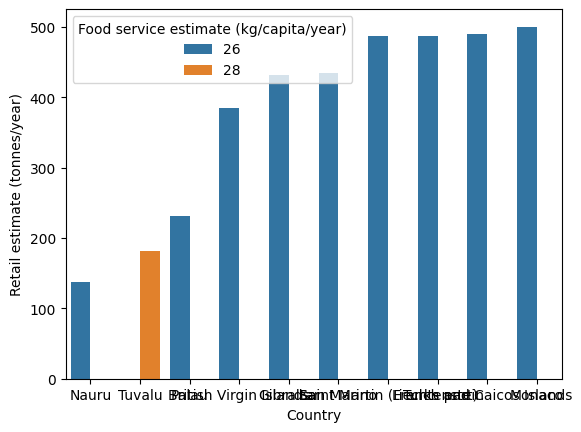

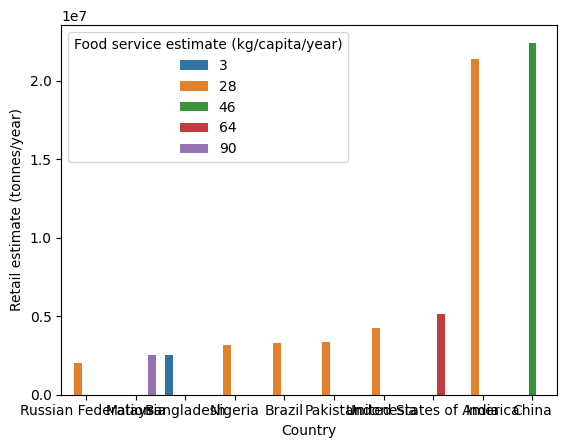

In [11]:
sns.barplot(x='Country', y='Retail estimate (tonnes/year)', hue='Food service estimate (kg/capita/year)' , data= food_service_vs_retail_by_country.head(10))
plt.show()

sns.barplot(x='Country', y='Retail estimate (tonnes/year)',hue='Food service estimate (kg/capita/year)' , data= food_service_vs_retail_by_country.tail(10))
plt.show()

In [12]:
import plotly.express as px
fig = px.treemap(df, path=['Country'], values='Household estimate (tonnes/year)')
fig.show()